In [ ]:
import json
import time
import pandas as pd  # Thư viện để tạo và hiển thị bảng đẹp mắt
from openai import OpenAI
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Import TẤT CẢ các mẫu prompt từ file prompt.py
# Điều này cho phép chúng ta dễ dàng gọi tên các prompt sau này
from prompt import *

Given a sample

In [ ]:
# !!! QUAN TRỌNG: Hãy điền API Key của bạn vào đây
api_key = "..."  # Thay thế bằng API Key của bạn

# 1. Khởi tạo Client với API Key
client = OpenAI(api_key=api_key)

# 2. Định nghĩa các "thí sinh" (model) và tất cả các "bài thi" (prompt)
MODELS_TO_COMPARE = ["gpt-3.5-turbo", "gpt-4o-mini"]
PROMPTS_TO_TEST = {
    # Key là tên sẽ hiển thị trong bảng, Value là biến prompt từ file prompt.py
    "English Prompt (1-shot)": ENGLISH_ONE,
    "Persian Prompt (1-shot)": PERSIAN_ONE,
    "English Prompt (3-shot)": ENGLISH_THREE,
    "Persian Prompt (3-shot)": PERSIAN_THREE,
    "English Prompt (Zero-shot)": ENGLISH_ZERO,
    "Persian Prompt (Zero-shot)": PERSIAN_ZERO
}

# 3. Tải toàn bộ dữ liệu từ file entailment(ParsiNLU).jsonl
try:
    full_data = []
    # Dùng đúng tên file dữ liệu bạn đã cung cấp
    with open('entailment(ParsiNLU).jsonl', 'r', encoding='utf-8') as reader:
        for line in reader:
            full_data.append(json.loads(line))
    
    SAMPLE_SIZE = 201
    all_data = full_data[:SAMPLE_SIZE] 
    
    print(f" Đã tải thành công {len(full_data)} review.")
    print(f" sử dụng {len(all_data)} review để kiểm tra.")

except FileNotFoundError:
    print(" Lỗi: Không tìm thấy file 'entailment(ParsiNLU).jsonl'.")

 Đã tải thành công 201 review.
 sử dụng 201 review để kiểm tra.


In [13]:
def get_answer_from_model(prompt, model_name):
    """
    Hàm này nhận một prompt và tên model, sau đó trả về câu trả lời.
    """
    try:
        response = client.chat.completions.create(
          model=model_name,
          messages=[
                {"role": "system", "content": "You are an expert in natural language inference."},
                {"role": "user", "content": prompt}
            ],
          temperature=0,
          max_tokens=20  # Tăng nhẹ max_tokens vì model có thể trả về từ đầy đủ
        )
        # Lấy nội dung, xóa khoảng trắng và chuyển về chữ thường để dễ so sánh
        return response.choices[0].message.content.strip().lower()
    except Exception as e:
        print(f"\nLỗi khi gọi model {model_name}: {e}")
        return "ERROR"

In [ ]:
# Dictionary để lưu kết quả dự đoán của tất cả các kịch bản
all_predictions = {}

# Bắt đầu vòng lặp lớn
for model_name in MODELS_TO_COMPARE:
    print(f"============== BẮT ĐẦU MODEL: {model_name} ==============")
    all_predictions[model_name] = {}
    
    # Vòng lặp bên trong: chạy qua từng loại prompt
    for prompt_name, prompt_template in PROMPTS_TO_TEST.items():
        print(f"--- 🚀 Đang chạy kịch bản: {prompt_name} ---")
        
        model_predictions_for_prompt = []
        
        # Chạy qua toàn bộ dữ liệu cho kịch bản hiện tại
        for sample in tqdm(all_data, desc=f"Querying {prompt_name}"):
            prompt = prompt_template.format(premise=sample['premise'], hypothesis=sample['hypothesis'])
            answer = get_answer_from_model(prompt, model_name)
            model_predictions_for_prompt.append(answer)
            time.sleep(1)

        # Lưu kết quả dự đoán của model này cho kịch bản prompt này
        all_predictions[model_name][prompt_name] = model_predictions_for_prompt
        print(f"--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: {prompt_name} ---\n")

print("✨ Đã hoàn thành tất cả các thử nghiệm.")

============== BẮT ĐẦU MODEL: gpt-3.5-turbo ==============
--- 🚀 Đang chạy kịch bản: English Prompt (1-shot) ---


Querying English Prompt (1-shot): 100%|██████████| 201/201 [05:41<00:00,  1.70s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (1-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (1-shot) ---


Querying Persian Prompt (1-shot): 100%|██████████| 201/201 [05:31<00:00,  1.65s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (1-shot) ---

--- 🚀 Đang chạy kịch bản: English Prompt (3-shot) ---


Querying English Prompt (3-shot): 100%|██████████| 201/201 [05:49<00:00,  1.74s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (3-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (3-shot) ---


Querying Persian Prompt (3-shot): 100%|██████████| 201/201 [05:37<00:00,  1.68s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (3-shot) ---

--- 🚀 Đang chạy kịch bản: English Prompt (Zero-shot) ---


Querying English Prompt (Zero-shot): 100%|██████████| 201/201 [05:54<00:00,  1.76s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (Zero-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (Zero-shot) ---


Querying Persian Prompt (Zero-shot): 100%|██████████| 201/201 [05:33<00:00,  1.66s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (Zero-shot) ---

============== BẮT ĐẦU MODEL: gpt-4o-mini ==============
--- 🚀 Đang chạy kịch bản: English Prompt (1-shot) ---


Querying English Prompt (1-shot): 100%|██████████| 201/201 [05:38<00:00,  1.69s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (1-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (1-shot) ---


Querying Persian Prompt (1-shot): 100%|██████████| 201/201 [06:14<00:00,  1.86s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (1-shot) ---

--- 🚀 Đang chạy kịch bản: English Prompt (3-shot) ---


Querying English Prompt (3-shot): 100%|██████████| 201/201 [05:32<00:00,  1.65s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (3-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (3-shot) ---


Querying Persian Prompt (3-shot): 100%|██████████| 201/201 [06:30<00:00,  1.95s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (3-shot) ---

--- 🚀 Đang chạy kịch bản: English Prompt (Zero-shot) ---


Querying English Prompt (Zero-shot): 100%|██████████| 201/201 [06:26<00:00,  1.92s/it]


--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: English Prompt (Zero-shot) ---

--- 🚀 Đang chạy kịch bản: Persian Prompt (Zero-shot) ---


Querying Persian Prompt (Zero-shot): 100%|██████████| 201/201 [06:35<00:00,  1.97s/it]

--- 🎉 Hoàn thành thu thập dữ liệu cho kịch bản: Persian Prompt (Zero-shot) ---

✨ Đã hoàn thành tất cả các thử nghiệm.


In [15]:
print(prompt)

هدف وظیفه‌ی استنتاج زبان طبیعی تشخیص رابطه‌ی نتیجه‌گیری بین یک <فرضیه> با توجه به یک <پیش‌فرض> است.
رابطه‌ یا برچسب میان آن‌ها می‌تواند یکی از سه نوع تناظر، تناقض یا ناشناخته باشد.
- تناظر : اگر جمله <فرضیه> به طور منطقی نتیجه‌ای از جمله <پیش‌فرض> باشد
- تناقض : اگر جمله <فرضیه> با جمله <پیش‌فرض> در تناقض باشد
- ناشناخته : اگر رابطه‌ای قطعی بین جمله <پیش‌فرض> و جمله <فرضیه> وجود نداشته باشد و هیچ تناظر یا تناقضی نتوان برقرار کرد

الگوی نمونه:
<پیش‌فرض><sep><فرضیه>
<برچسب>:
    تناقض یا تناظر یا ناشناخته

برای نمونه تست زیر نام محتمل‌ترین برچسب را چاپ کن:
<شهرستان پیرس ۸۹۰٫۹۶ کیلومترمربع مساحت دارد.><sep><شهرستان پیرس، کمتر از 1 میلیون کیلومتر مربع وسعت دارد>
<برچسب>:
    ?


In [19]:
from hazm import Normalizer

print("\n\n📊=============== BẢNG SO SÁNH HIỆU NĂNG (ParsiNLU) ===============📊")

# 1. Ánh xạ từ nhãn 'c', 'e', 'n' sang từ đầy đủ bằng tiếng Anh
English_label_mapping = lambda x: {
    'c': 'contradiction',
    'e': 'entailment',
    'n': 'neutral'
}.get(str(x).lower(), 'unknown')

# 2. Lấy danh sách nhãn đúng từ dữ liệu và "dịch" chúng sang từ đầy đủ
true_labels_short = [sample['target'] for sample in all_data]
true_labels_full = [English_label_mapping(label) for label in true_labels_short]

# 3. Các nhãn có thể có (dạng từ đầy đủ) để báo cáo
english_labels_full = ['contradiction', 'entailment', 'neutral']

# DataFrame để lưu trữ chỉ số Accuracy
accuracy_results = {}

# === HÀM SỬA LỖI QUAN TRỌNG ===
def post_process_predictions(predictions, normalizer):
    """Chuẩn hóa và lọc các dự đoán không hợp lệ, hiểu cả tiếng Anh và Ba Tư."""
    processed = []
    # Bản đồ dịch ngược từ Ba Tư sang Anh
    persian_to_english_map = {
        'تناقض': 'contradiction',
        'تناظر': 'entailment',
        'ناشناخته': 'neutral'
    }
    
    for pred in predictions:
        # Chuẩn hóa cả câu trả lời của model
        normalized_pred = normalizer.normalize(pred.lower())
        found = False
        
        # Kiểm tra các từ khóa tiếng Anh
        for label in english_labels_full:
            if label in normalized_pred:
                processed.append(label)
                found = True
                break
        if found:
            continue
            
        # Nếu không tìm thấy, kiểm tra các từ khóa tiếng Ba Tư
        for fa_label, en_label in persian_to_english_map.items():
            if fa_label in normalized_pred:
                processed.append(en_label)
                found = True
                break
        if not found:
            processed.append("unknown") # Gán nhãn lỗi nếu không tìm thấy
            
    return processed

# 4. Vòng lặp qua kết quả của từng model để tính toán và in báo cáo chi tiết
normalizer = Normalizer()
for model_name, prompt_results in all_predictions.items():
    accuracy_results[model_name] = {}
    print(f"\n\n============== Báo cáo chi tiết cho Model: {model_name} ==============")
    for prompt_name, predictions in prompt_results.items():
        print(f"\n--- Kịch bản: {prompt_name} ---")
        
        # Sử dụng hàm mới để làm sạch dự đoán
        processed_predictions = post_process_predictions(predictions, normalizer)
        
        # In báo cáo chi tiết (precision, recall, f1-score)
        print(classification_report(true_labels_full, processed_predictions,
                                      labels=english_labels_full,
                                      target_names=english_labels_full,
                                      zero_division=0,
                                      digits=3))
        
        # Tính và lưu lại accuracy
        accuracy = accuracy_score(true_labels_full, processed_predictions)
        accuracy_results[model_name][prompt_name] = accuracy * 100

# 5. Tạo và in bảng so sánh cuối cùng
summary_df = pd.DataFrame(accuracy_results)
summary_df = summary_df.applymap(lambda x: f"{x:.2f}%" if isinstance(x, (float, int)) else x)
summary_df.columns.name = "Model"
summary_df.index.name = "Prompt / Kịch bản"

print("\n\n📊=============== BẢNG TÓM TẮT ACCURACY ===============📊")
print(summary_df.to_markdown())



📊=============== BẢNG SO SÁNH HIỆU NĂNG (ParsiNLU) ===============📊


============== Báo cáo chi tiết cho Model: gpt-3.5-turbo ==============

--- Kịch bản: English Prompt (1-shot) ---
               precision    recall  f1-score   support

contradiction      0.540     0.403     0.462        67
   entailment      0.500     0.045     0.082        67
      neutral      0.800     0.060     0.111        67

    micro avg      0.557     0.169     0.260       201
    macro avg      0.613     0.169     0.218       201
 weighted avg      0.613     0.169     0.218       201


--- Kịch bản: Persian Prompt (1-shot) ---
               precision    recall  f1-score   support

contradiction      0.450     0.940     0.609        67
   entailment      0.620     0.463     0.530        67
      neutral      0.700     0.104     0.182        67

    micro avg      0.505     0.502     0.504       201
    macro avg      0.590     0.502     0.440       201
 weighted avg      0.590     0.502     0.440      

C:\Users\GiaHyTran\AppData\Local\Temp\ipykernel_25712\722653556.py:82: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df = summary_df.applymap(lambda x: f"{x:.2f}%" if isinstance(x, (float, int)) else x)




📈=============== BIỂU ĐỒ SO SÁNH HIỆU SUẤT TRUNG BÌNH (NLU) ===============📈


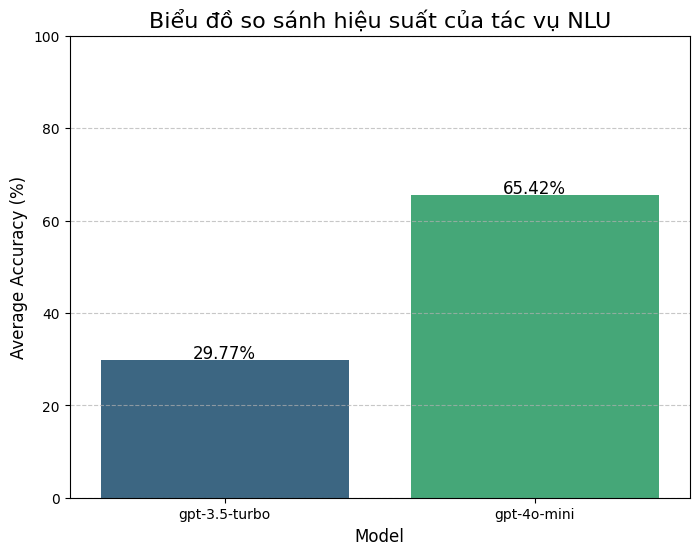



📊=============== BẢNG TÓM TẮT HIỆU SUẤT CHI TIẾT (NLU) ===============📊
| Experiment                 |   gpt-3.5-turbo |   gpt-4o-mini |
|:---------------------------|----------------:|--------------:|
| English Prompt (1-shot)    |           16.91 |         71.14 |
| English Prompt (3-shot)    |           18.41 |         73.13 |
| English Prompt (Zero-shot) |            2.99 |         37.31 |
| Persian Prompt (1-shot)    |           50.25 |         69.15 |
| Persian Prompt (3-shot)    |           41.29 |         73.13 |
| Persian Prompt (Zero-shot) |           48.76 |         68.66 |


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nlu_data = {
    'Experiment': [
        'English Prompt (1-shot)', 'Persian Prompt (1-shot)', 'English Prompt (3-shot)',
        'Persian Prompt (3-shot)', 'English Prompt (Zero-shot)', 'Persian Prompt (Zero-shot)'
    ] * 2,
    'Model': [
        'gpt-3.5-turbo'] * 6 + ['gpt-4o-mini'] * 6
    ,
    'Accuracy': [
        # gpt-3.5-turbo scores (lấy từ cột Accuracy trong bảng của bạn)
        16.91, 50.25, 18.41, 41.29, 2.99, 48.76,
        # gpt-4o-mini scores
        71.14, 69.15, 73.13, 73.13, 37.31, 68.66
    ]
}

df_nlu = pd.DataFrame(nlu_data)

print("\n\n📈=============== BIỂU ĐỒ SO SÁNH HIỆU SUẤT TRUNG BÌNH (NLU) ===============📈")

# Nhóm theo model và tính điểm accuracy trung bình
df_summary = df_nlu.groupby('Model')['Accuracy'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=df_summary, hue='Model', palette='viridis', legend=False)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ so sánh hiệu suất của tác vụ NLU', fontsize=16)
plt.ylabel('Average Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên mỗi cột
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

# Hiển thị bảng tóm tắt chi tiết
print("\n\n📊=============== BẢNG TÓM TẮT HIỆU SUẤT CHI TIẾT (NLU) ===============📊")
pivot_detailed = df_nlu.pivot_table(index='Experiment', columns='Model', values='Accuracy')
print(pivot_detailed.to_markdown(floatfmt=".2f"))